# Preprocessing Household Electricity Consumption Data
This notebook demonstrates preprocessing steps on synthetic household electricity consumption data.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Synthetic_Household_Electricity_Consumption_Dataset.csv')
data.head()

,Appliance,Voltage (V),Power Consumption (W),Daily Usage (hrs),Monthly Usage (%)
0,Fan,230,82.12,8.00,19.02
1,Air Conditioner,230,1588.76,4.21,40.17
2,Refrigerator,230,199.58,24.00,8.23
3,LED Bulb,230,15.94,7.90,7.15
4,Television,230,98.72,3.09,4.35


## Step 1: Check for Missing Values

In [2]:
missing_values = data.isnull().sum()
missing_values

Appliance                0
Voltage (V)              0
Power Consumption (W)    0
Daily Usage (hrs)        0
Monthly Usage (%)        0
dtype: int64

## Step 2: Standardize Numerical Data
Using `StandardScaler` to standardize *Power Consumption (W)* and *Daily Usage (hrs)*.

In [3]:
scaler = StandardScaler()
data[['Power Consumption (W)', 'Daily Usage (hrs)']] = scaler.fit_transform(data[['Power Consumption (W)', 'Daily Usage (hrs)']])
data.head()

,Appliance,Voltage (V),Power Consumption (W),Daily Usage (hrs),Monthly Usage (%)
0,Fan,230,-0.905778,0.344560,19.02
1,Air Conditioner,230,0.801732,-0.190922,40.17
2,Refrigerator,230,-0.772658,2.605167,8.23
3,LED Bulb,230,-0.980782,0.330431,7.15
4,Television,230,-0.886965,-0.349164,4.35


## Step 3: Add Derived Feature - Daily Energy Consumption (Wh)
Calculate the daily energy consumption by multiplying *Power Consumption (W)* and *Daily Usage (hrs)*.

In [4]:
data['Daily Energy Consumption (Wh)'] = data['Power Consumption (W)'] * data['Daily Usage (hrs)']
data.head()

,Appliance,Voltage (V),Power Consumption (W),Daily Usage (hrs),Monthly Usage (%),Daily Energy Consumption (Wh)
0,Fan,230,-0.905778,0.344560,19.02,-0.312095
1,Air Conditioner,230,0.801732,-0.190922,40.17,-0.153068
2,Refrigerator,230,-0.772658,2.605167,8.23,-2.012904
3,LED Bulb,230,-0.980782,0.330431,7.15,-0.324081
4,Television,230,-0.886965,-0.349164,4.35,0.309697


## Saving the Preprocessed Dataset

In [5]:
processed_file_path = 'Preprocessed_Household_Electricity_Consumption_Dataset.csv'
data.to_csv(processed_file_path, index=False)
processed_file_path


'Preprocessed_Household_Electricity_Consumption_Dataset.csv'

## Data Visualization

In [6]:
# importing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Distribution of Power Consumption

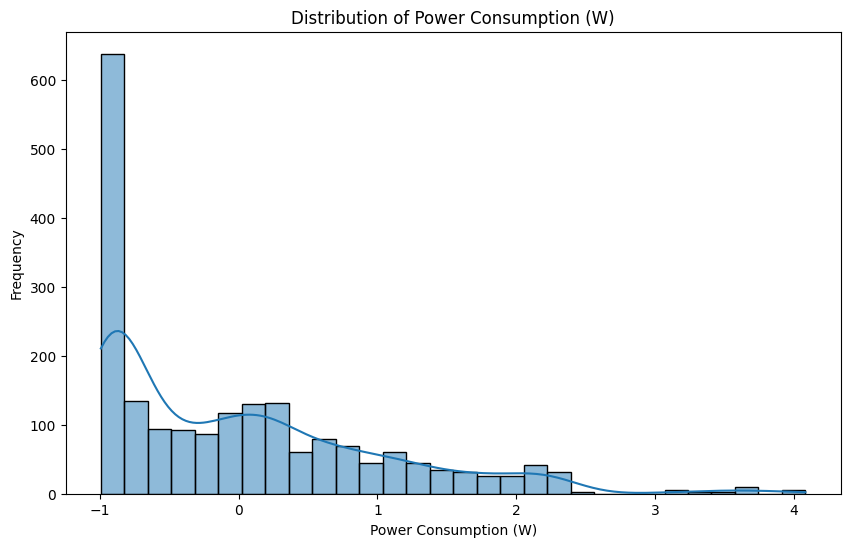

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Power Consumption (W)'], bins=30, kde=True)
plt.title('Distribution of Power Consumption (W)')
plt.xlabel('Power Consumption (W)')
plt.ylabel('Frequency')
plt.show()


## Average Daily Usage by Appliance Type

C:\Users\avina\AppData\Local\Temp\ipykernel_27292\2693095273.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Appliance', y='Daily Usage (hrs)', data=data1, estimator='mean', ci=None, palette='viridis')
C:\Users\avina\AppData\Local\Temp\ipykernel_27292\2693095273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Appliance', y='Daily Usage (hrs)', data=data1, estimator='mean', ci=None, palette='viridis')


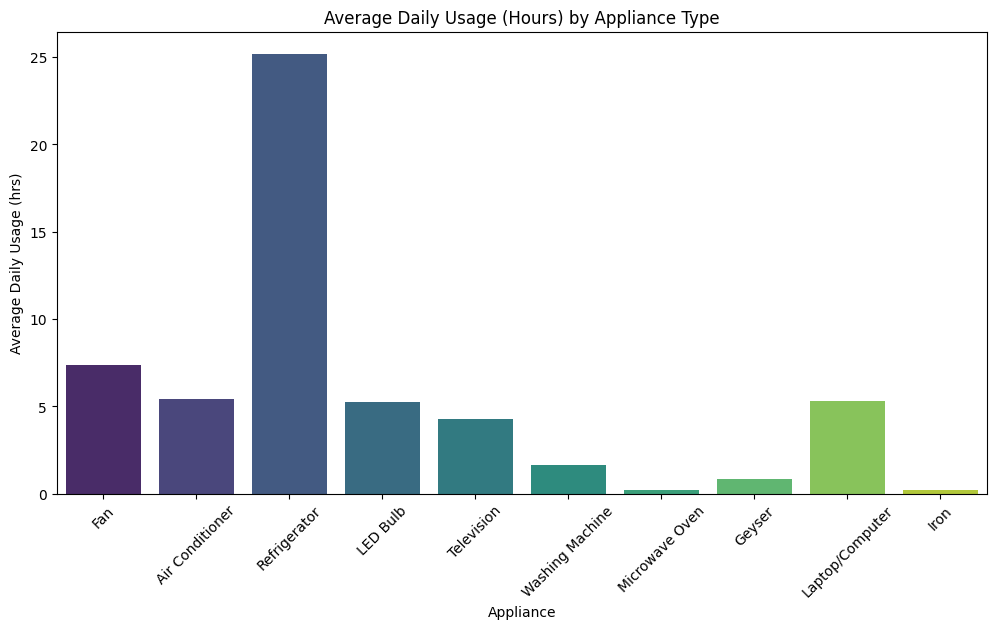

In [8]:
data1 = pd.read_csv('Synthetic_Household_Electricity_Consumption_Dataset.csv')
data1.head()
plt.figure(figsize=(12, 6))
sns.barplot(x='Appliance', y='Daily Usage (hrs)', data=data1, estimator='mean', ci=None, palette='viridis')
plt.title('Average Daily Usage (Hours) by Appliance Type')
plt.xticks(rotation=45)
plt.xlabel('Appliance')
plt.ylabel('Average Daily Usage (hrs)')
plt.show()

## Power Consumption vs. Daily Energy Consumption

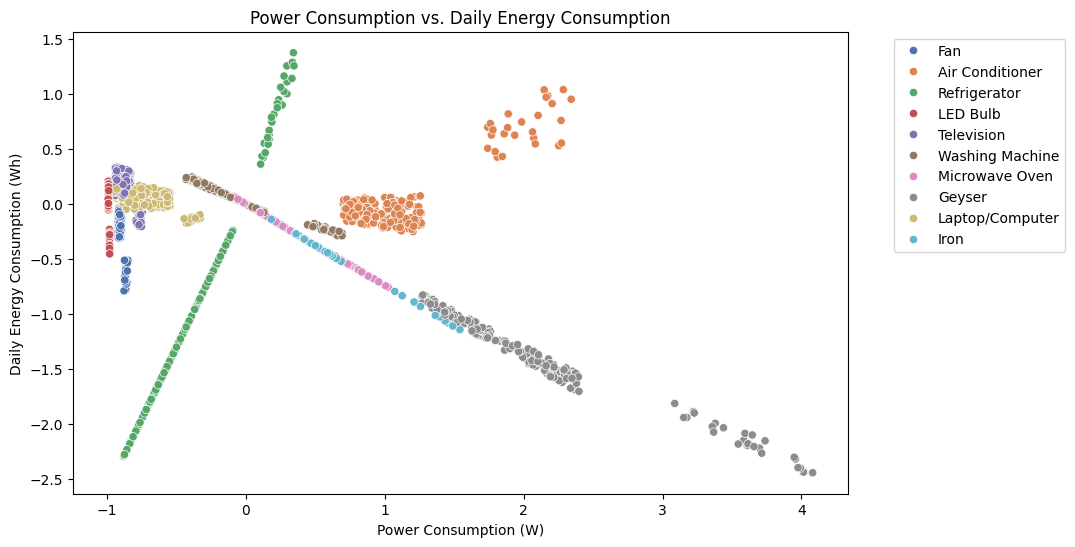

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power Consumption (W)', y='Daily Energy Consumption (Wh)', data=data, hue='Appliance', palette='deep')
plt.title('Power Consumption vs. Daily Energy Consumption')
plt.xlabel('Power Consumption (W)')
plt.ylabel('Daily Energy Consumption (Wh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Correlation Heatmap

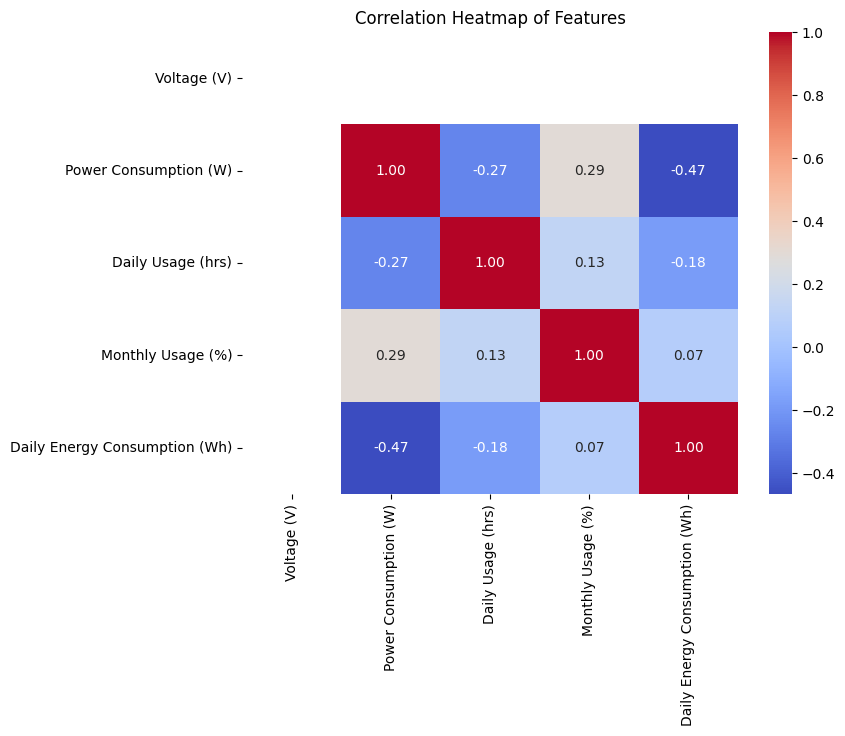

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=[np.number])

# Step 2: Handle any NaN values (optional, based on your data)
numeric_data = numeric_data.fillna(0)  # Or you can use numeric_data.dropna()

# Step 3: Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


## Import Necessary Libraries for Modeling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report


## Prepare the Data for Modeling

In [12]:
# Use only numeric columns for modeling
X = numeric_data.drop(columns=["Daily Energy Consumption (Wh)"])  # Features
y_reg = numeric_data["Daily Energy Consumption (Wh)"]  

## Train Regression Model for Energy Prediction

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train RandomForestRegressor
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (Regression): {rmse}")


Root Mean Squared Error (Regression): 0.014818478394584108


C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Train Classification Model for Efficient Usage Detection

In [14]:
# Define high usage threshold for classification
high_usage_threshold = y_reg.quantile(0.75)  # Top 25% as high usage

# Create binary target for classification
y_class = (y_reg > high_usage_threshold).astype(int)

# Train-test split for classification
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate classification
y_pred_class = classifier.predict(X_test)
print(f"Accuracy (Classification): {accuracy_score(y_test, y_pred_class)}")
print(classification_report(y_test, y_pred_class))


Accuracy (Classification): 0.9925
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       289
           1       0.99      0.98      0.99       111

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [15]:
def generate_suggestion(appliance, usage_prediction, threshold):
    if usage_prediction > threshold:
        return f"High usage detected for {appliance}. Consider optimizing settings or usage time."
    return f"Usage for {appliance} is within the efficient range."


In [16]:
for idx, appliance in enumerate(X.columns):
    usage_pred = reg_model.predict([X_test.iloc[idx]])[0]  # Predict usage
    print(generate_suggestion(appliance, usage_pred, high_usage_threshold))


Usage for Voltage (V) is within the efficient range.
High usage detected for Power Consumption (W). Consider optimizing settings or usage time.
Usage for Daily Usage (hrs) is within the efficient range.
High usage detected for Monthly Usage (%). Consider optimizing settings or usage time.


C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Regression Model Trained (MSE: 0.00038)
Classification Model Trained (Accuracy: 97.00%)


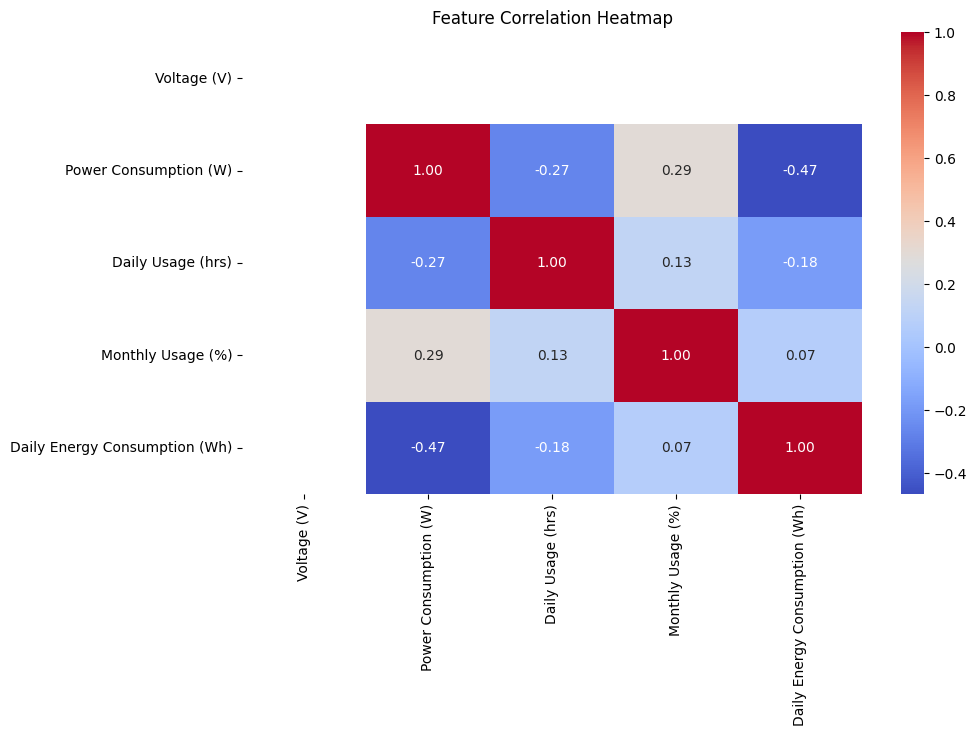

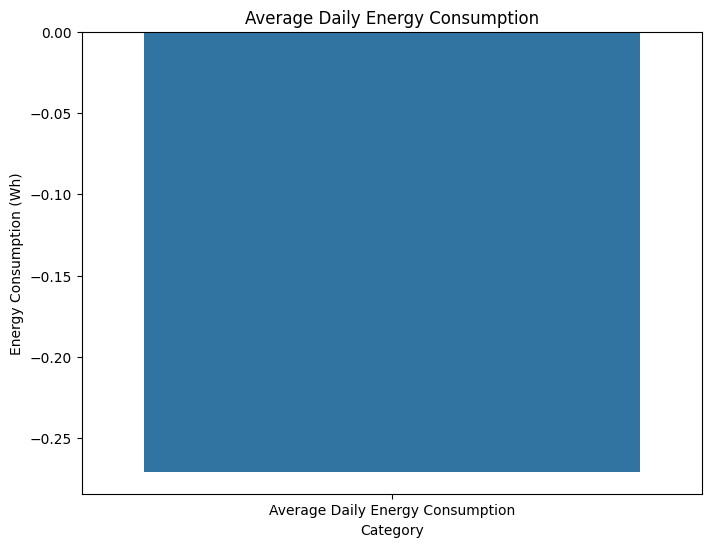

C:\Users\avina\AppData\Local\Temp\ipykernel_27292\3528005123.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.y_class, y=self.y_reg, palette="Set3")


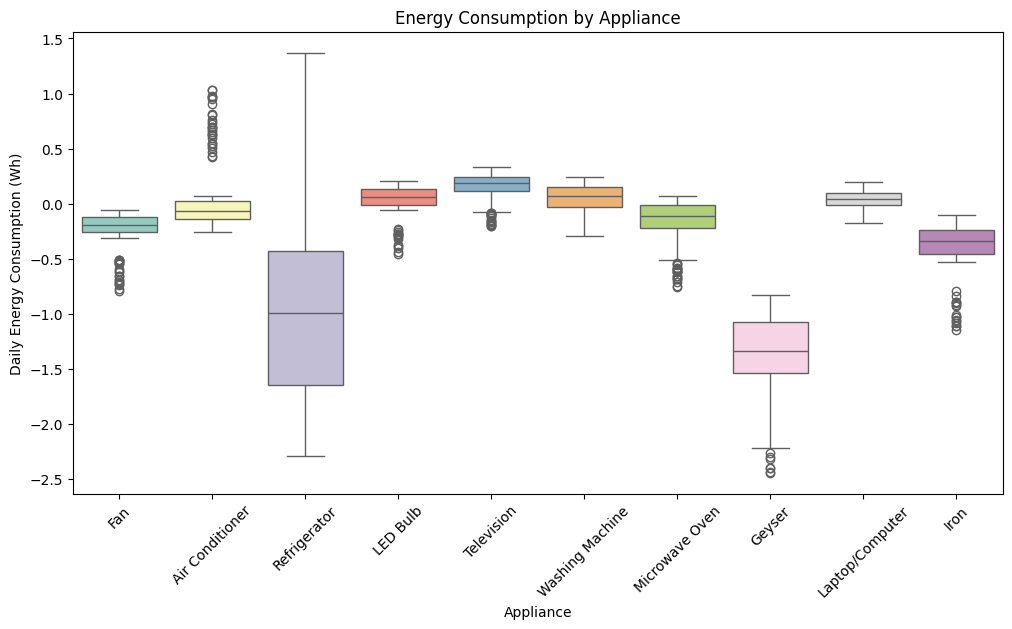

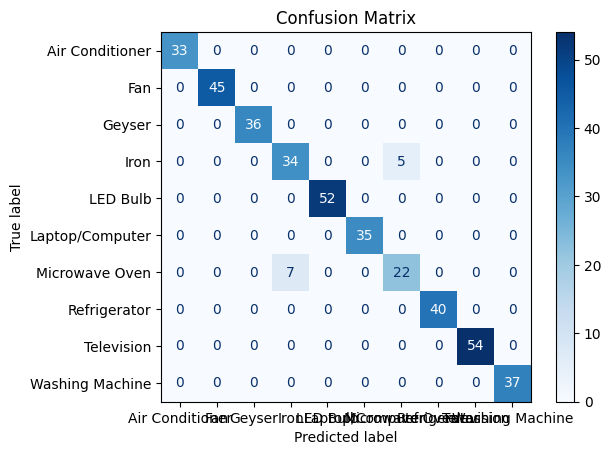

Accuracy: 97.00%
Precision: 96.99%
Recall: 97.00%
F1 Score: 96.98%
Predicted Energy Consumption: -2.30 Wh
Appliance in Use: Refrigerator
Suggestion: Avoid keeping the door open for long periods and ensure it's away from direct sunlight.
Current usage is efficient.



C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import train_test_split


class SmartEnergyManager:
    def __init__(self, data):
        # Preparing data
        self.X = data[['Voltage (V)', 'Power Consumption (W)', 'Daily Usage (hrs)', 'Monthly Usage (%)']]
        self.y_reg = data['Daily Energy Consumption (Wh)']
        self.y_class = data['Appliance']
        
        # Models
        self.regressor = DecisionTreeRegressor(random_state=42)
        self.classifier = RandomForestClassifier(random_state=42)
        
        # Train models
        self._train_models()
    
    def _train_models(self):
        # Splitting data for regression
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
            self.X, self.y_reg, test_size=0.2, random_state=42
        )
        # Splitting data for classification
        X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
            self.X, self.y_class, test_size=0.2, random_state=42
        )
        
        # Train regression model
        self.regressor.fit(X_train_reg, y_train_reg)
        y_pred_reg = self.regressor.predict(X_test_reg)
        self.regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
        
        # Train classification model
        self.classifier.fit(X_train_class, y_train_class)
        y_pred_class = self.classifier.predict(X_test_class)
        self.classification_accuracy = accuracy_score(y_test_class, y_pred_class)
        
        print(f"Regression Model Trained (MSE: {self.regression_mse:.5f})")
        print(f"Classification Model Trained (Accuracy: {self.classification_accuracy * 100:.2f}%)")
    
    def predict_energy_consumption(self, input_features):
        """
        Predicts daily energy consumption (Wh) based on input features.
        """
        return self.regressor.predict([input_features])[0]
    
    def classify_appliance_usage(self, input_features):
        """
        Classifies the appliance likely in use based on input features.
        """
        return self.classifier.predict([input_features])[0]
    
    def suggest_energy_optimization(self, input_features):
        """
        Provides suggestions for energy optimization based on predictions and classification.
        """
        predicted_consumption = self.predict_energy_consumption(input_features)
        appliance = self.classify_appliance_usage(input_features)
        
        suggestion = f"Predicted Energy Consumption: {predicted_consumption:.2f} Wh\n"
        suggestion += f"Appliance in Use: {appliance}\n"
        
        suggestions = {
            "Fan": "Consider using energy-efficient fans to reduce power consumption by up to 30%.",
            "Air Conditioner": "Set the temperature to 24-26°C and clean filters regularly for optimal efficiency.",
            "Refrigerator": "Avoid keeping the door open for long periods and ensure it's away from direct sunlight.",
            "LED Bulbs": "Replace incandescent bulbs with LEDs for up to 80% energy savings.",
            "Television": "Turn off at the power source when not in use to reduce standby power usage.",
            "Washing Machine": "Wash full loads and use the eco or cold-water setting.",
            "Microwave Oven": "Limit usage to reheating food rather than long cooking sessions.",
            "Geyser (Water Heater)": "Set the temperature to 50°C and insulate pipes for efficiency.",
            "Laptop/Computer": "Enable sleep mode and turn off screens when idle.",
            "Iron": "Iron clothes in bulk to save reheating energy."
        }
        
        if appliance in suggestions:
            suggestion += f"Suggestion: {suggestions[appliance]}\n"
        else:
            suggestion += "Suggestion: No specific suggestion available for this appliance.\n"
        
        if predicted_consumption > 500:  # Example threshold
            suggestion += "Consider reducing the usage of this appliance during peak hours.\n"
        else:
            suggestion += "Current usage is efficient.\n"
        
        return suggestion
    
    def plot_heatmap(self):
        """
        Displays a heatmap of feature correlations.
        """
        correlation_matrix = self.X.join(self.y_reg).corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Feature Correlation Heatmap")
        plt.show()

    def plot_average_energy_consumption(self):
        """
        Plots the average daily energy consumption.
        """
        avg_consumption = self.y_reg.mean()
        plt.figure(figsize=(8, 6))
        sns.barplot(x=["Average Daily Energy Consumption"], y=[avg_consumption])
        plt.title("Average Daily Energy Consumption")
        plt.ylabel("Energy Consumption (Wh)")
        plt.xlabel("Category")
        plt.show()

    def plot_appliance_energy_consumption(self):
        """
        Plots energy consumption distribution by appliance.
        """
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=self.y_class, y=self.y_reg, palette="Set3")
        plt.title("Energy Consumption by Appliance")
        plt.xlabel("Appliance")
        plt.ylabel("Daily Energy Consumption (Wh)")
        plt.xticks(rotation=45)
        plt.show()

    def show_confusion_matrix(self):
        """
        Displays the confusion matrix for the classifier.
        """
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y_class, test_size=0.2, random_state=42)
        y_pred = self.classifier.predict(X_test)
        
        cm = confusion_matrix(y_test, y_pred, labels=self.classifier.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.classifier.classes_)
        disp.plot(cmap="Blues", values_format="d")
        plt.title("Confusion Matrix")
        plt.show()
        
        self.classification_accuracy = accuracy_score(y_test, y_pred)
        self.precision = precision_score(y_test, y_pred, average='weighted')
        self.recall = recall_score(y_test, y_pred, average='weighted')
        self.f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"Accuracy: {self.classification_accuracy * 100:.2f}%")
        print(f"Precision: {self.precision * 100:.2f}%")
        print(f"Recall: {self.recall * 100:.2f}%")
        print(f"F1 Score: {self.f1 * 100:.2f}%")

# Load dataset
data = pd.read_csv('Preprocessed_Household_Electricity_Consumption_Dataset.csv')

# Initialize manager
manager = SmartEnergyManager(data)

# Visualizations
manager.plot_heatmap()
manager.plot_average_energy_consumption()
manager.plot_appliance_energy_consumption()
manager.show_confusion_matrix()

# Example input for prediction
input_features = [230,82.12,8.0,19.02]
suggestion = manager.suggest_energy_optimization(input_features)

print(suggestion)


Regression Model Trained (MSE: 0.00038)
Classification Model Trained (Accuracy: 97.00%)


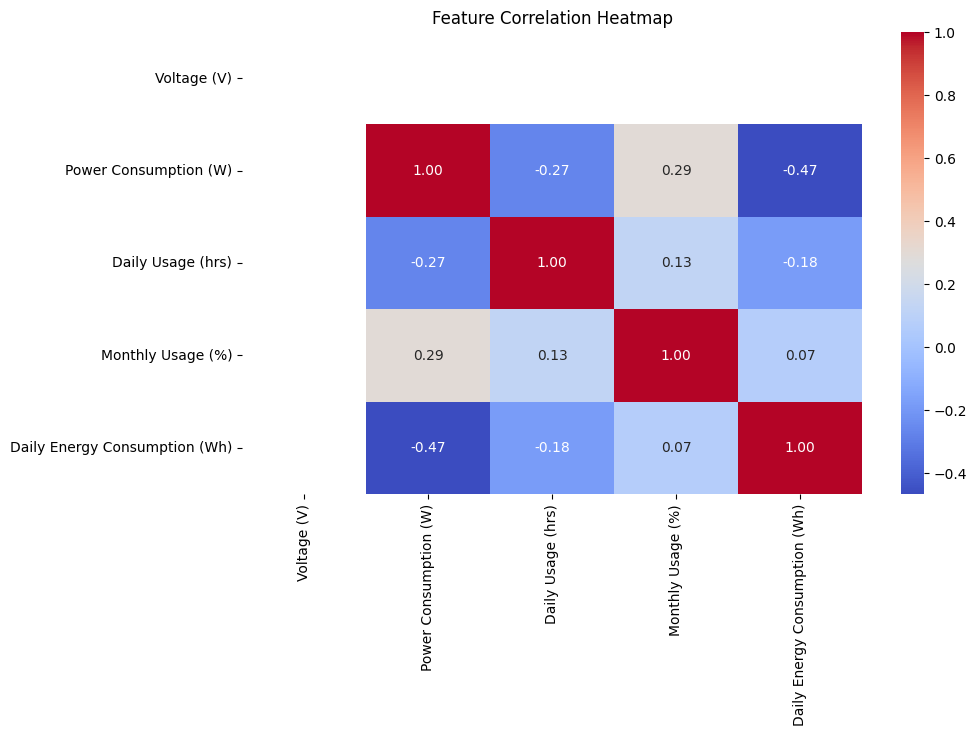

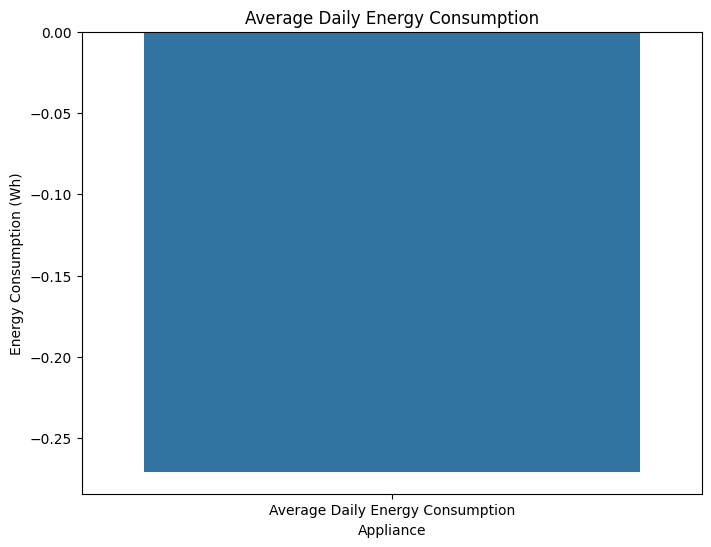

C:\Users\avina\AppData\Local\Temp\ipykernel_27292\4238549069.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.y_class, y=self.y_reg, palette="Set3")


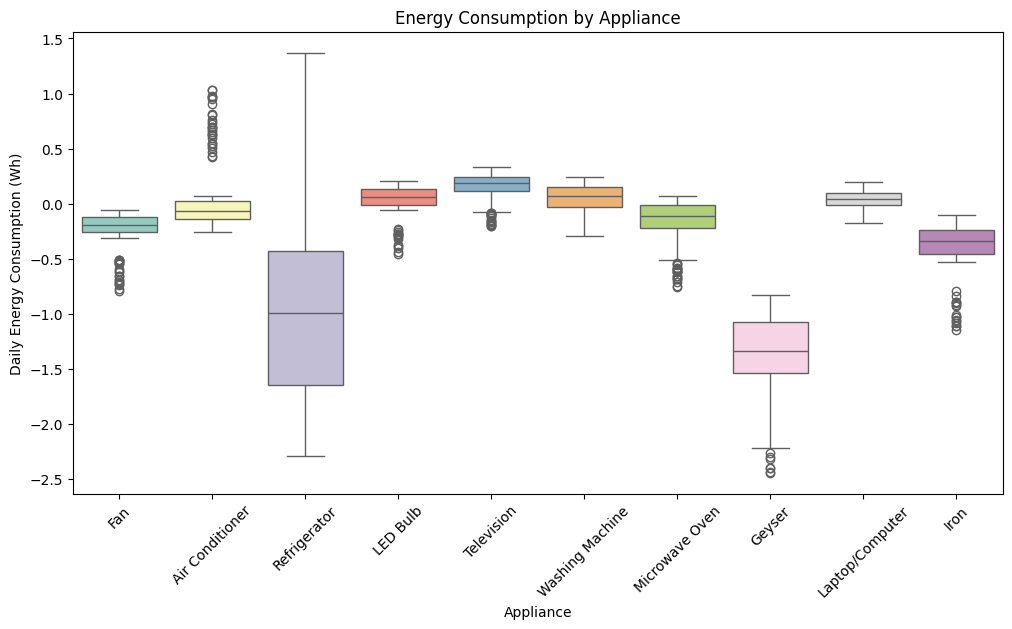

C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted Energy Consumption: -2.30 Wh
Appliance in Use: Refrigerator
Suggestion: Current usage is efficient.



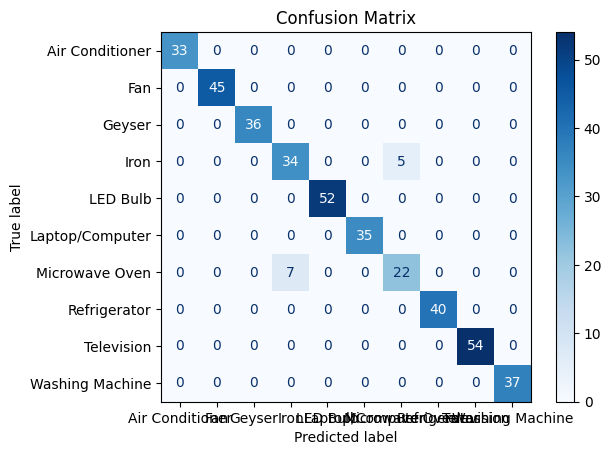

Decision Tree Model Trained (Accuracy: 97.00%)
Precision: 96.99%
Recall: 97.00%
F1 Score: 96.98%
Decision Tree Model Trained (Accuracy: 58.00%)


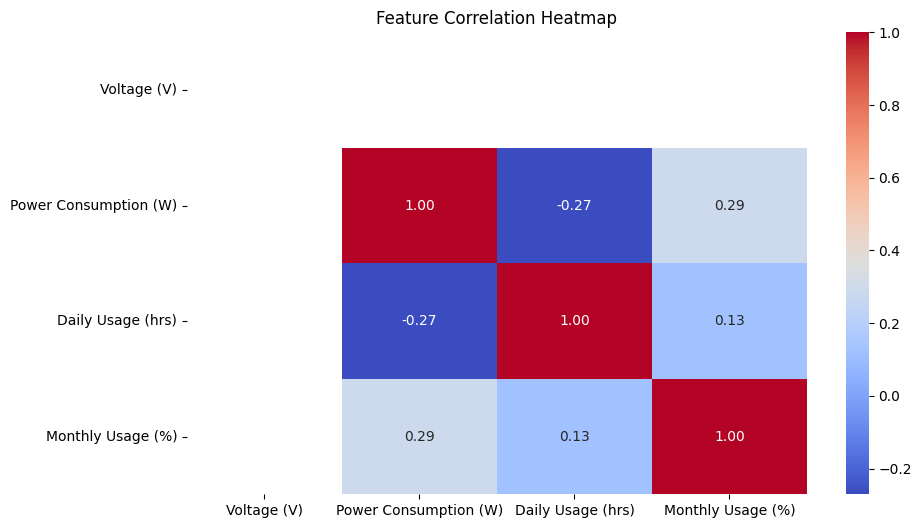

C:\Users\avina\AppData\Local\Temp\ipykernel_27292\4238549069.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.y_class, palette="viridis")


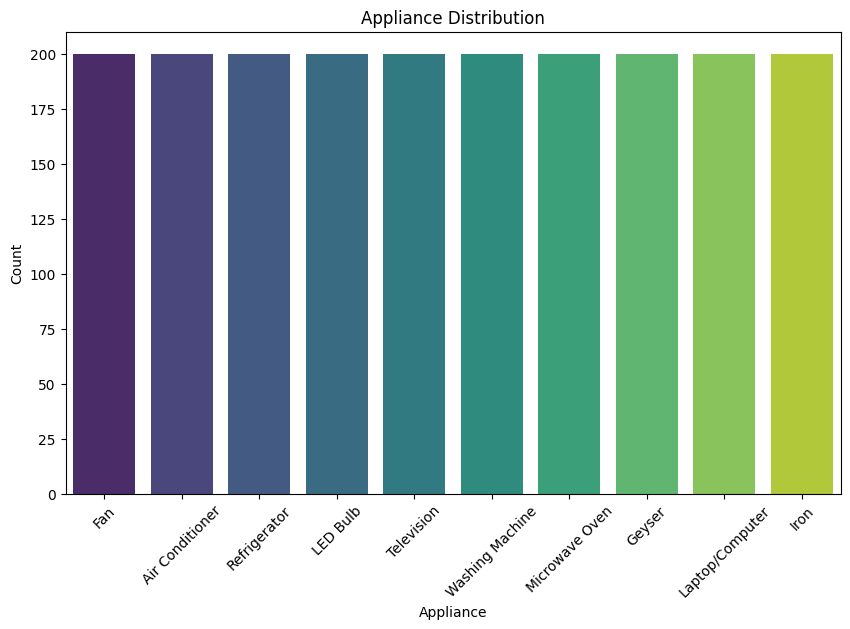

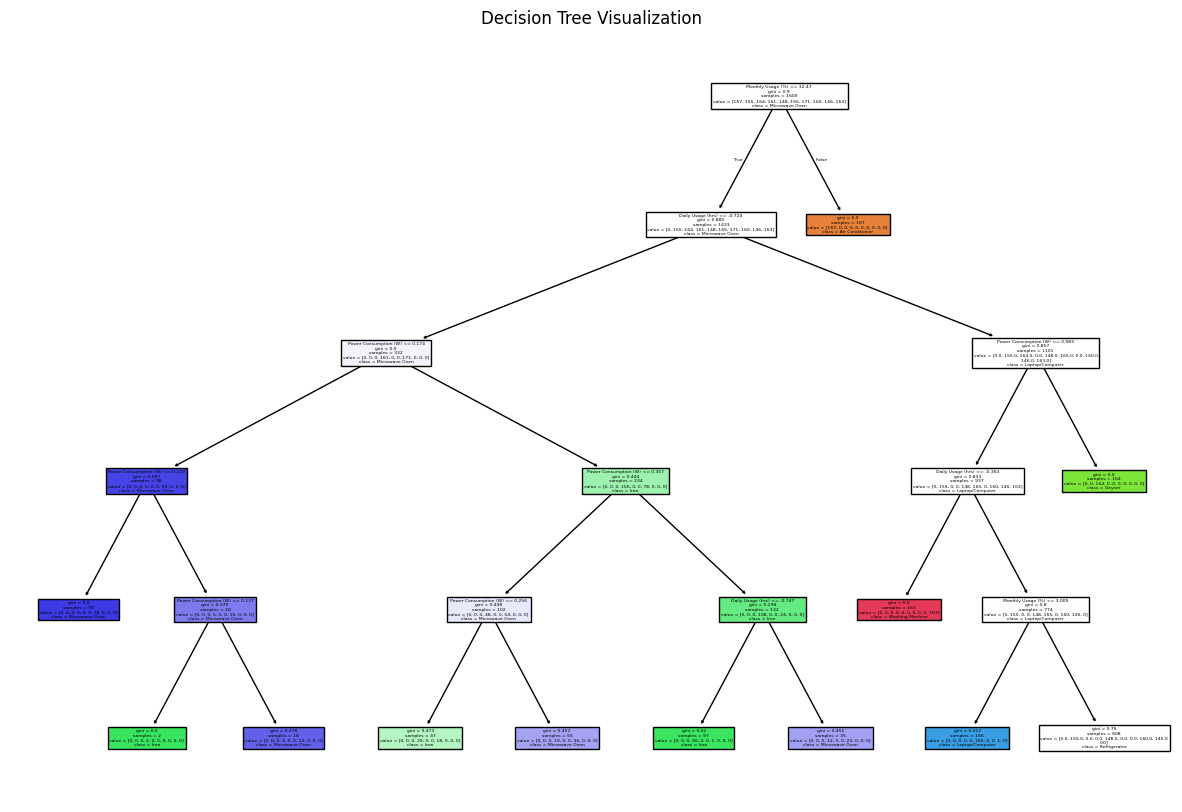

Predicted Appliance: Air Conditioner
Suggestion: Set the temperature to 24-26°C and clean filters regularly for optimal efficiency.


C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


class SmartEnergyManager:
    def __init__(self, data):
        # Preparing data
        self.X = data[['Voltage (V)', 'Power Consumption (W)', 'Daily Usage (hrs)', 'Monthly Usage (%)']]
        self.y_reg = data['Daily Energy Consumption (Wh)']
        self.y_class = data['Appliance']
        
        # Models
        self.regressor = DecisionTreeRegressor(random_state=42)
        self.classifier = RandomForestClassifier(random_state=42)
        
        # Train models
        self._train_models()
    
    def _train_models(self):
        # Splitting data for regression
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
            self.X, self.y_reg, test_size=0.2, random_state=42
        )
        # Splitting data for classification
        X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
            self.X, self.y_class, test_size=0.2, random_state=42
        )
        
        # Train regression model
        self.regressor.fit(X_train_reg, y_train_reg)
        y_pred_reg = self.regressor.predict(X_test_reg)
        self.regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
        
        # Train classification model
        self.classifier.fit(X_train_class, y_train_class)
        y_pred_class = self.classifier.predict(X_test_class)
        self.classification_accuracy = accuracy_score(y_test_class, y_pred_class)
        
        print(f"Regression Model Trained (MSE: {self.regression_mse:.5f})")
        print(f"Classification Model Trained (Accuracy: {self.classification_accuracy * 100:.2f}%)")
       

   
    
    def predict_energy_consumption(self, input_features):
        """
        Predicts daily energy consumption (Wh) based on input features.
        Input features: [Voltage (V), Power Consumption (W), Daily Usage (hrs), Monthly Usage (%)]
        """
        return self.regressor.predict([input_features])[0]
    
    def classify_appliance_usage(self, input_features):
        """
        Classifies the appliance likely in use based on input features.
        Input features: [Voltage (V), Power Consumption (W), Daily Usage (hrs), Monthly Usage (%)]
        """
        return self.classifier.predict([input_features])[0]
    
    def suggest_energy_optimization(self, input_features):
        """
        Provides suggestions for energy optimization based on predictions and classification.
        """
        predicted_consumption = self.predict_energy_consumption(input_features)
        appliance = self.classify_appliance_usage(input_features)
        
        suggestion = f"Predicted Energy Consumption: {predicted_consumption:.2f} Wh\n"
        suggestion += f"Appliance in Use: {appliance}\n"
        if predicted_consumption > 500:  # Example threshold
            suggestion += "Suggestion: Consider reducing the usage of this appliance during peak hours.\n"
        else:
            suggestion += "Suggestion: Current usage is efficient.\n"
        return suggestion
    
    def plot_heatmap(self):
        """
        Displays a heatmap of feature correlations.
        """
        correlation_matrix = self.X.join(self.y_reg).corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Feature Correlation Heatmap")
        plt.show()

    def plot_average_energy_consumption(self):
        """
        Plots the average daily energy consumption.
        """
        avg_consumption = self.y_reg.mean()
        plt.figure(figsize=(8, 6))
        sns.barplot(x=["Average Daily Energy Consumption"], y=[avg_consumption])
        plt.title("Average Daily Energy Consumption")
        plt.ylabel("Energy Consumption (Wh)")
        plt.xlabel("Appliance")
        plt.show()

    def plot_appliance_energy_consumption(self):
        """
        Plots energy consumption distribution by appliance.
        """
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=self.y_class, y=self.y_reg, palette="Set3")
        plt.title("Energy Consumption by Appliance")
        plt.xlabel("Appliance")
        plt.ylabel("Daily Energy Consumption (Wh)")
        plt.xticks(rotation=45)
        plt.show()
    def show_confusion_matrix(self):
        """
        Displays the confusion matrix for the Decision Tree Classifier.
        """
        # Splitting data for visualization
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y_class, test_size=0.2, random_state=42)
        y_pred = self.classifier.predict(X_test)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=self.classifier.classes_)
        
        # Display confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.classifier.classes_)
        disp.plot(cmap="Blues", values_format="d")
        plt.title("Confusion Matrix")
        plt.show()
        self.classification_accuracy = accuracy_score(y_test, y_pred)
        self.precision = precision_score(y_test, y_pred, average='weighted')
        self.recall = recall_score(y_test, y_pred, average='weighted')
        self.f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"Decision Tree Model Trained (Accuracy: {self.classification_accuracy * 100:.2f}%)")
        print(f"Precision: {self.precision * 100:.2f}%")
        print(f"Recall: {self.recall * 100:.2f}%")
        print(f"F1 Score: {self.f1 * 100:.2f}%")
    
    

# Load your dataset

data = pd.read_csv('Preprocessed_Household_Electricity_Consumption_Dataset.csv')

# Initialize the extended manager
manager = SmartEnergyManager(data)

# Display heatmap
manager.plot_heatmap()

# Plot average energy consumption
manager.plot_average_energy_consumption()

# Plot appliance energy consumption
manager.plot_appliance_energy_consumption()

# Example input features: [Voltage (V), Power Consumption (W), Daily Usage (hrs), Monthly Usage (%)]
input_features = [230, 100, 4, 20]  # Example data
suggestion = manager.suggest_energy_optimization(input_features)

print(suggestion)
class SmartEnergyManager:
    def __init__(self, data):
        # Preparing data
        self.X = data[['Voltage (V)', 'Power Consumption (W)', 'Daily Usage (hrs)', 'Monthly Usage (%)']]
        self.y_class = data['Appliance']
        
        # Classifier
        self.classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
        
        # Train model
        self._train_model()
    
    def _train_model(self):
        # Splitting data for classification
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y_class, test_size=0.2, random_state=42)
        
        # Train Decision Tree model
        self.classifier.fit(X_train, y_train)
        y_pred = self.classifier.predict(X_test)
        self.classification_accuracy = accuracy_score(y_test, y_pred)
        
        print(f"Decision Tree Model Trained (Accuracy: {self.classification_accuracy * 100:.2f}%)")
    
    def classify_appliance_usage(self, input_features):
        """
        Classifies the appliance likely in use based on input features.
        Input features: [Voltage (V), Power Consumption (W), Daily Usage (hrs), Monthly Usage (%)]
        """
        return self.classifier.predict([input_features])[0]
    
    def suggest_energy_optimization(self, input_features):
        """
        Provides appliance-specific suggestions for energy optimization based on classification.
        """
        appliance = self.classify_appliance_usage(input_features)
        
        suggestions = {
            "Fan": "Consider using energy-efficient fans to reduce power consumption by up to 30%.",
            "Air Conditioner": "Set the temperature to 24-26°C and clean filters regularly for optimal efficiency.",
            "Refrigerator": "Avoid keeping the door open for long periods and ensure it's away from direct sunlight.",
            "LED Bulbs": "Replace incandescent bulbs with LEDs for up to 80% energy savings.",
            "Television": "Turn off at the power source when not in use to reduce standby power usage.",
            "Washing Machine": "Wash full loads and use the eco or cold-water setting.",
            "Microwave Oven": "Limit usage to reheating food rather than long cooking sessions.",
            "Geyser (Water Heater)": "Set the temperature to 50°C and insulate pipes for efficiency.",
            "Laptop/Computer": "Enable sleep mode and turn off screens when idle.",
            "Iron": "Iron clothes in bulk to save reheating energy."
        }
        
        suggestion = suggestions.get(appliance, "No specific suggestion available for this appliance.")
        return f"Predicted Appliance: {appliance}\nSuggestion: {suggestion}"
    
    def plot_heatmap(self):
        """
        Displays a heatmap of feature correlations.
        """
        correlation_matrix = self.X.corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Feature Correlation Heatmap")
        plt.show()

    def plot_appliance_distribution(self):
        """
        Displays the distribution of appliances in the dataset.
        """
        plt.figure(figsize=(10, 6))
        sns.countplot(x=self.y_class, palette="viridis")
        plt.title("Appliance Distribution")
        plt.xlabel("Appliance")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

    def visualize_decision_tree(self, feature_names):
        """
        Visualizes the trained Decision Tree.
        """
        plt.figure(figsize=(15, 10))
        plot_tree(self.classifier, feature_names=feature_names, class_names=self.classifier.classes_, filled=True)
        plt.title("Decision Tree Visualization")
        plt.show()

# Load your datasetfile_path = '/mnt/data/Preprocessed_Household_Electricity_Consumption_Dataset.csv'

data = pd.read_csv('Preprocessed_Household_Electricity_Consumption_Dataset.csv')
manager.show_confusion_matrix()

# Initialize the manager
manager = SmartEnergyManager(data)

# Plot heatmap
manager.plot_heatmap()

# Plot appliance distribution
manager.plot_appliance_distribution()

# Visualize the decision tree
manager.visualize_decision_tree(feature_names=['Voltage (V)', 'Power Consumption (W)', 'Daily Usage (hrs)', 'Monthly Usage (%)'])

# Example input features: [Voltage (V), Power Consumption (W), Daily Usage (hrs), Monthly Usage (%)]
input_features = [230, 1500, 5, 40]  # Example data for appliance classification
suggestion = manager.suggest_energy_optimization(input_features)

print(suggestion)

